In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import itertools as it

def friedman_aligned_ranks_test(*args):
    k = len(args)
    if k < 2: raise ValueError('Less than 2 levels')
    n = len(args[0])
    if len(set([len(v) for v in args])) != 1: raise ValueError('Unequal number of samples')

    aligned_observations = []
    for i in range(n):
        loc = sp.mean([col[i] for col in args])
        aligned_observations.extend([col[i] - loc for col in args])
        
    aligned_observations_sort = sorted(aligned_observations)
    
    aligned_ranks = []
    for i in range(n):
        row = []
        for j in range(k):
            v = aligned_observations[i*k+j]
            row.append(aligned_observations_sort.index(v) + 1 + (aligned_observations_sort.count(v)-1)/2.)
        aligned_ranks.append(row)

    rankings_avg = [sp.mean([case[j] for case in aligned_ranks]) for j in range(k)]
    rankings_cmp = [r/sp.sqrt(k*(n*k+1)/6.) for r in rankings_avg]

    r_i = [np.sum(case) for case in aligned_ranks]
    r_j = [np.sum([case[j] for case in aligned_ranks]) for j in range(k)]
    T = (k-1) * (sp.sum(v**2 for v in r_j) - (k*n**2/4.) * (k*n+1)**2) / float(((k*n*(k*n+1)*(2*k*n+1))/6.) - (1./float(k))*sp.sum(v**2 for v in r_i))

    p_value = 1 - st.chi2.cdf(T, k-1)

    return T, p_value, rankings_avg, rankings_cmp

In [2]:
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
cc_data=pd.read_csv('creditcard.csv')
cc_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [5]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

In [6]:
X=cc_data.drop(['Class'],axis=1)
y=cc_data['Class']
print(len(X))
print(len(y))
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

284807
284807
284315
492


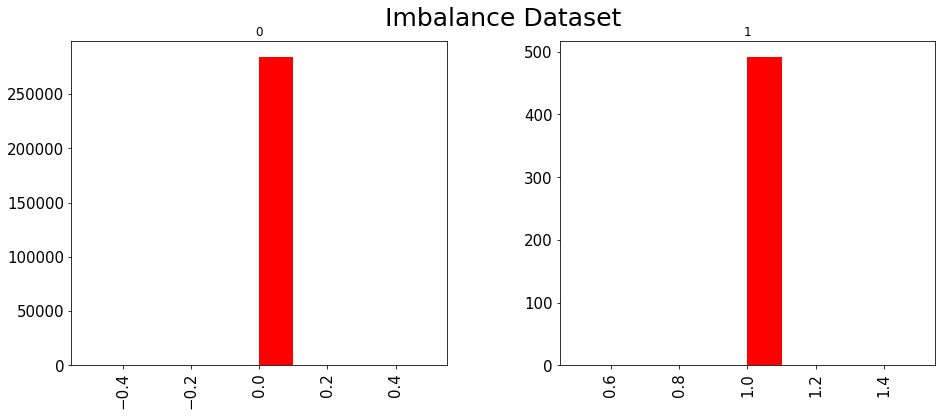

In [7]:
# sns.set(style="whitegrid")
cc_data.hist(by='Class', column='Class',figsize=(15,6),xlabelsize=15,ylabelsize=15,color="red")
plt.suptitle('Imbalance Dataset', fontsize=25)
plt.savefig('./Dataset.png')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


### Outlier detection techniques
* https://scikit-learn.org/stable/modules/outlier_detection.html

#####  2. Z Score

* while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

### Ways to Handle Imbalanced data set:
* Under sampling: In this method basically we downsize the actual data set in such a way that the ratio of the dependent categories become 10:1. Some of the ways to do under sampling is :
   * a.Condensed Nearest-Neighbor
   * b. One-Sided Selection


In [9]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

In [10]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1')
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators =100,random_state=11)
import xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha =0.2)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
from sklearn import tree
clf =  tree.DecisionTreeClassifier()

In [11]:
classifier = {'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc,
            'XGBoost':xg,'KNeighbors':knn,'SVM':svc,'DecisionTreeClassifier':clf}
classifie=sorted(classifier.keys())
print(classifie)
print(type(classifie))
# Classifi= classifi.append(classifie)
# df = pd.DataFrame({'Classiifier':classifie})
# print (df)

['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 'RandomForest', 'SVM', 'XGBoost', 'logistic']
<class 'list'>


In [12]:
  #defining a dictionary of classifier
classifier={'Adaboost': abc,'DecisionTreeClassifier':clf,'GaussianNB': gnb,'KNeighbors':knn,'MultinomialNB': mnb,
            'RandomForest': rfc,'SVM':svc,'XGBoost':xg,'logistic': lr}
# classifier=sorted(classifier)
# print(classifier)
Classifi=['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 'RandomForest', 'SVM'
          , 'XGBoost', 'logistic']

df=pd.DataFrame(Classifi,columns=['Classiifier'])
df
# print(classifier)

,Classiifier
0,Adaboost
1,DecisionTreeClassifier
2,GaussianNB
3,KNeighbors
4,MultinomialNB
5,RandomForest
6,SVM
7,XGBoost
8,logistic


### Over sampling

###### 1. SMOTE:
* What smote does is simple. First it finds the n-nearest neighbors in the minority class for each of the samples in the class . Then it draws a line between the the neighbors an generates random points on the lines.

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print(X.shape)
X_sm, y_sm = sm.fit_sample(X, y)

(284807, 30)


In [15]:
print(np.count_nonzero(y_sm == 0))
print(np.count_nonzero(y_sm == 1))
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

284315
284315


C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

<Figure size 2160x1800 with 0 Axes>

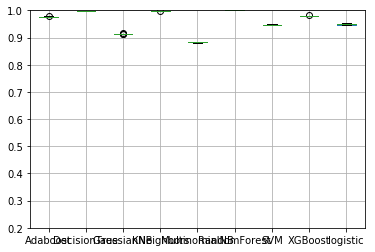

,Adaboost,DecisionTree,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.975134,0.998277,0.912915,0.999015,0.882931,0.999842,0.946363,0.979600,0.948755
1,0.977490,0.998400,0.915764,0.999297,0.884883,0.999894,0.950039,0.981834,0.951727
2,0.976628,0.998347,0.913073,0.999121,0.883441,0.999947,0.948051,0.980374,0.950232
3,0.975872,0.998382,0.911473,0.999121,0.882052,0.999842,0.944974,0.977842,0.946592
4,0.976031,0.998189,0.912985,0.999068,0.881384,0.999859,0.947102,0.979583,0.948386
5,0.974623,0.998488,0.911698,0.999437,0.881714,0.999930,0.945359,0.979512,0.946959
6,0.975731,0.998575,0.912666,0.999050,0.882417,0.999930,0.946045,0.978545,0.947293
7,0.978351,0.998470,0.913088,0.999209,0.881678,0.999947,0.947944,0.980778,0.949386
8,0.975555,0.998364,0.912719,0.999121,0.883068,0.999947,0.946502,0.979002,0.948261
9,0.975678,0.998575,0.912613,0.999033,0.882206,0.999930,0.947540,0.979318,0.948542


In [17]:
#predict and storing score of each classifier
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
    results = cross_val_score(c,X_sm, y_sm, cv=kfold)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
#     testres=friedman_aligned_ranks_test(results)
    result=pd.DataFrame(results)
#     print(result)
#     sns.boxplot( result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
#     plt.ylabel('Accuracy')
#     plt.xticks(parameter_df['mean'])
# print(res)
res.columns = ['Adaboost', 'DecisionTree', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.2,1.0])
plt.show()
res

In [18]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.976109
DecisionTreeClassifier,0.998407
GaussianNB,0.912899
KNeighbors,0.999147
MultinomialNB,0.882577
RandomForest,0.999907
SVM,0.946992
XGBoost,0.979639
logistic,0.948613


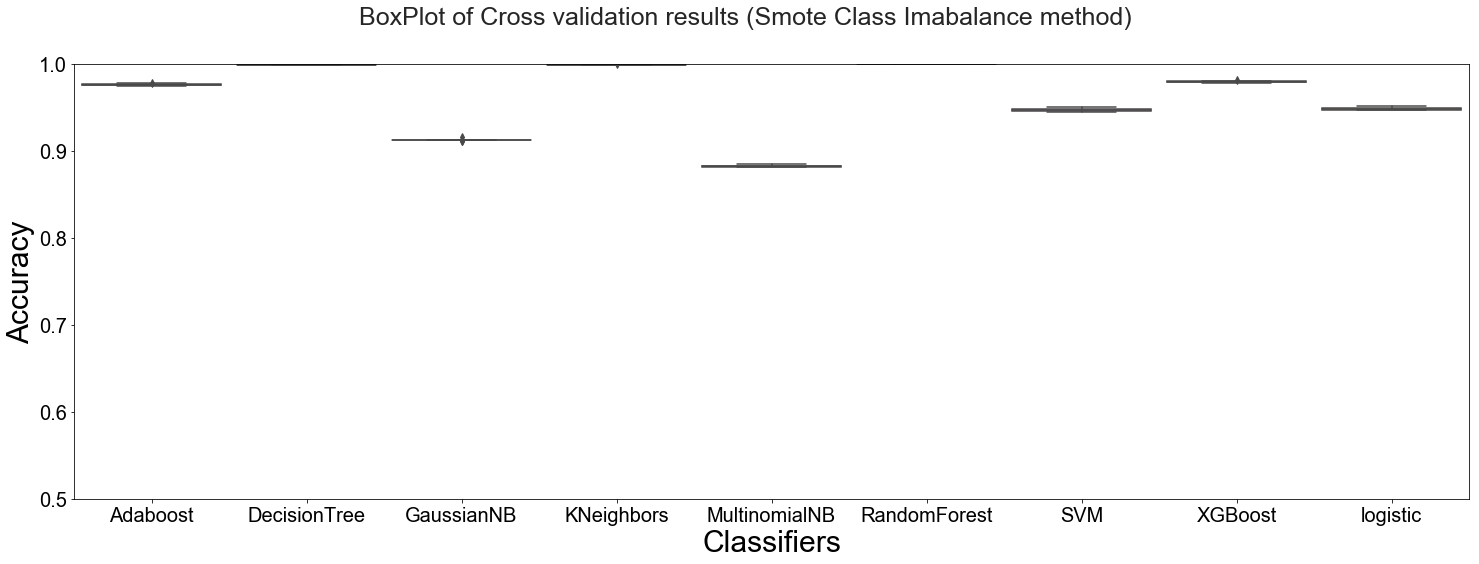

In [19]:
# rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.5,1.0])
fig.suptitle('BoxPlot of Cross validation results (Smote Class Imabalance method) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Classifiers',fontsize=30)
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
plt.savefig('./Smote_cross_validation.png',dpi=300)
plt.show()

In [20]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTree'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(77.7265894005773, 1.3999912340523224e-13, [45.5, 68.3, 15.5, 75.5, 5.5, 82.7, 26.0, 55.5, 35.0], [3.8944404818493075, 5.84594032769907, 1.32667752678383, 6.462203436914785, 0.47075654176200415, 7.0784665461305, 2.225394561056747, 4.750361466871133, 2.99572344757639])


In [21]:
def predict(clf,X_test):
    return clf.predict(X_test)

In [22]:
from sklearn.metrics import precision_recall_fscore_support as score


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=11)
 Total time in : 
 292.3141620159149
Confusion_matrix 
 [[83771  1378]
 [ 2684 82756]]
Precision: 0.9836213659162765
Recall: 0.9685861423220974
f1_score: 0.9760458560864285
AUC: 0.976

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
 Total time in : 
 38.78669357299805
Confusion_matrix 
 [[84927   222]
 [   85 85355]]
Precision: 0.9974058450284539
Recall: 0.999005149812734
f1_score: 0.998204856827099
AUC: 0.998

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.8195290565490723
Confusion_matrix 
 

C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 Classifier is: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
 Total time in : 
 2109.6157870292664
Confusion_matrix 
 [[83119  2030]
 [ 6673 78767]]
Precision: 0.9748753047761675
Recall: 0.9218984082397004
f1_score: 0.9476470340537908
AUC: 0.949


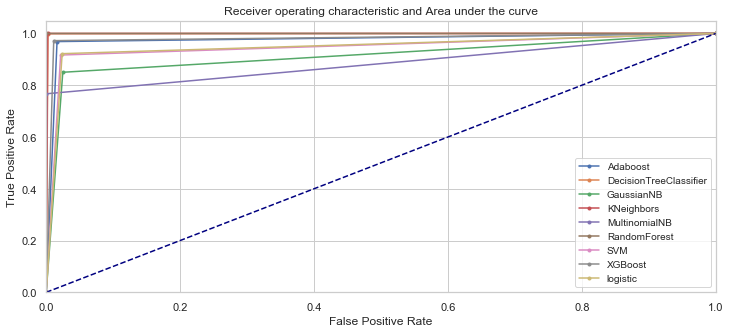

In [23]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred), metrics.f1_score(y_test,pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
    f1_score= print("f1_score:",metrics.f1_score(y_test,pred))
#     ROC AND AUC CURVE    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
    # show the plot
plt.savefig('./Smote2.png',dpi=300)
plt.show()

In [24]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.976188,0.983621,0.968586,0.976046,97.618838
DecisionTreeClassifier,0.998200,0.997406,0.999005,0.998205,99.820035
GaussianNB,0.912503,0.971754,0.850012,0.906815,91.250315
KNeighbors,0.998892,0.997793,1.000000,0.998895,99.889207
MultinomialNB,0.883082,0.999481,0.766959,0.867917,88.308156
RandomForest,0.999912,0.999824,1.000000,0.999912,99.991207
SVM,0.947429,0.977067,0.916550,0.945841,94.742920
XGBoost,0.980456,0.988598,0.972191,0.980326,98.045595
logistic,0.948983,0.974875,0.921898,0.947647,94.898264


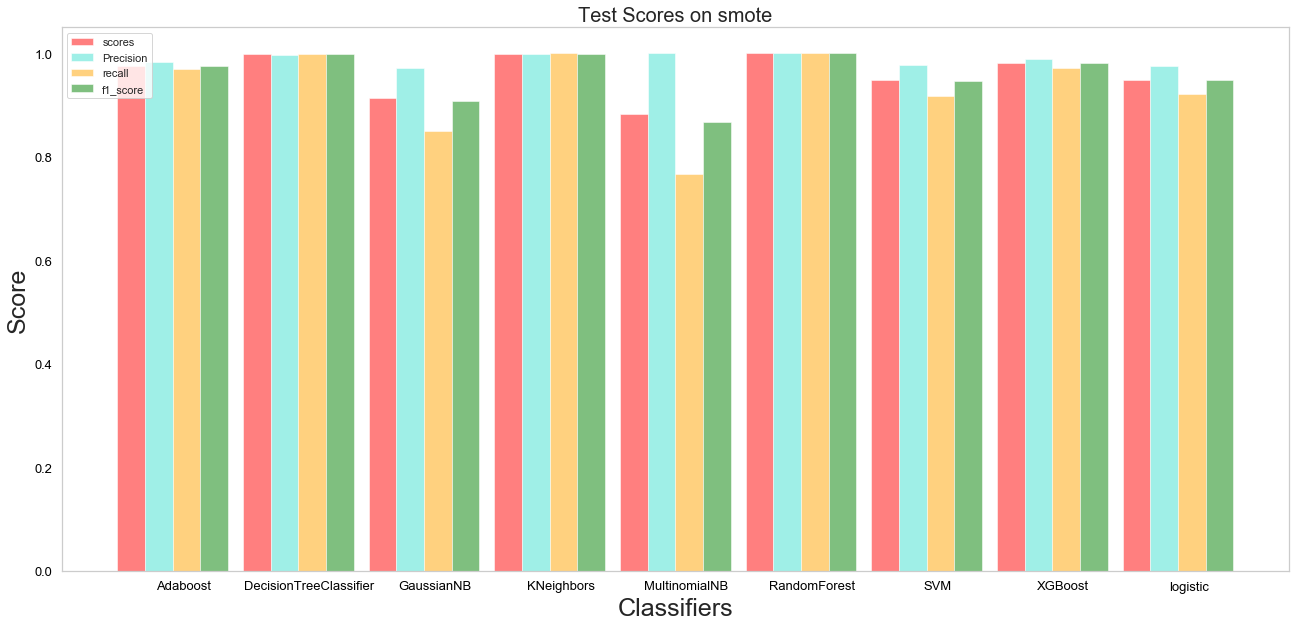

In [25]:
pos = list(range(len(df['Classiifier']))) 
width = 0.22 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(22,10)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='red',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 
plt.bar([p + width*3 for p in pos],score_df['f1_score'],width,alpha=0.5, color='green',label=score_df['f1_score']) 
ax.set_ylabel('Score',fontsize=25)
ax.set_xlabel('Classifiers',fontsize=25)
ax.set_title('Test Scores on smote',fontsize=20)
ax.set_xticks([p + 1.9 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
# plt.xlim(min(pos)-width, max(pos)+width*3)
# plt.ylim([0, max(score_df['scores'] + score_df['Precision'] + score_df['Recall']+score_df['f1_score'])] )
# plt.xlim([-1,X_train.shape[1]])
# plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall','f1_score'], loc='upper left')
plt.grid()
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
plt.savefig('./Smote1.png',dpi=300)
plt.show()

##### 2. RandomOver Sampling

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [27]:
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

284315
492


In [28]:
X_ros, y_ros = ros.fit_sample(X, y)
print(X_ros.shape[0] - X.shape[0], 'new random picked points')

283823 new random picked points


In [29]:
print(np.count_nonzero(y_ros == 0))
print(np.count_nonzero(y_ros == 1))
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

284315
284315


C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

<Figure size 2160x1800 with 0 Axes>

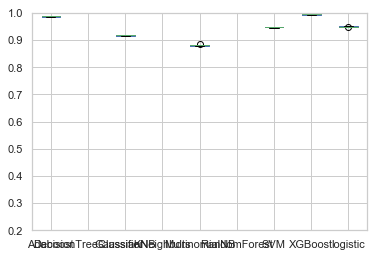

,Adaboost,DecisionTreeClassifier,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.987215,0.999859,0.916485,0.999666,0.880065,0.999947,0.946627,0.993177,0.948544
1,0.985914,0.999877,0.916678,0.999736,0.879959,0.999965,0.949265,0.993652,0.950250
2,0.986863,0.999824,0.917945,0.999648,0.879133,0.999982,0.948632,0.995111,0.948984
3,0.987954,0.999666,0.916010,0.999613,0.880557,0.999912,0.947278,0.994408,0.949441
4,0.985755,0.999719,0.916995,0.999578,0.880698,0.999930,0.947559,0.994162,0.949705
5,0.987953,0.999771,0.916869,0.999736,0.884088,0.999965,0.948999,0.992543,0.949650
6,0.985632,0.999824,0.917027,0.999525,0.881010,0.999982,0.946537,0.992983,0.948226
7,0.987795,0.999719,0.915497,0.999719,0.879427,0.999982,0.945078,0.992719,0.946660
8,0.986476,0.999930,0.915550,0.999648,0.880272,0.999982,0.946344,0.994232,0.948683
9,0.985755,0.999719,0.916693,0.999736,0.879040,0.999965,0.948120,0.994179,0.950213


In [30]:
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
    results = cross_val_score(c,X_ros, y_ros, cv=kfold)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
#     testres=friedman_aligned_ranks_test(results)
    result=pd.DataFrame(results)
#     print(result)
#     sns.boxplot( result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
#     plt.ylabel('Accuracy')
#     plt.xticks(parameter_df['mean'])
# print(res)
res.columns = ['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.2,1.0])
plt.show()
res

In [31]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.986731
DecisionTreeClassifier,0.999791
GaussianNB,0.916575
KNeighbors,0.999661
MultinomialNB,0.880425
RandomForest,0.999961
SVM,0.947444
XGBoost,0.993716
logistic,0.949035


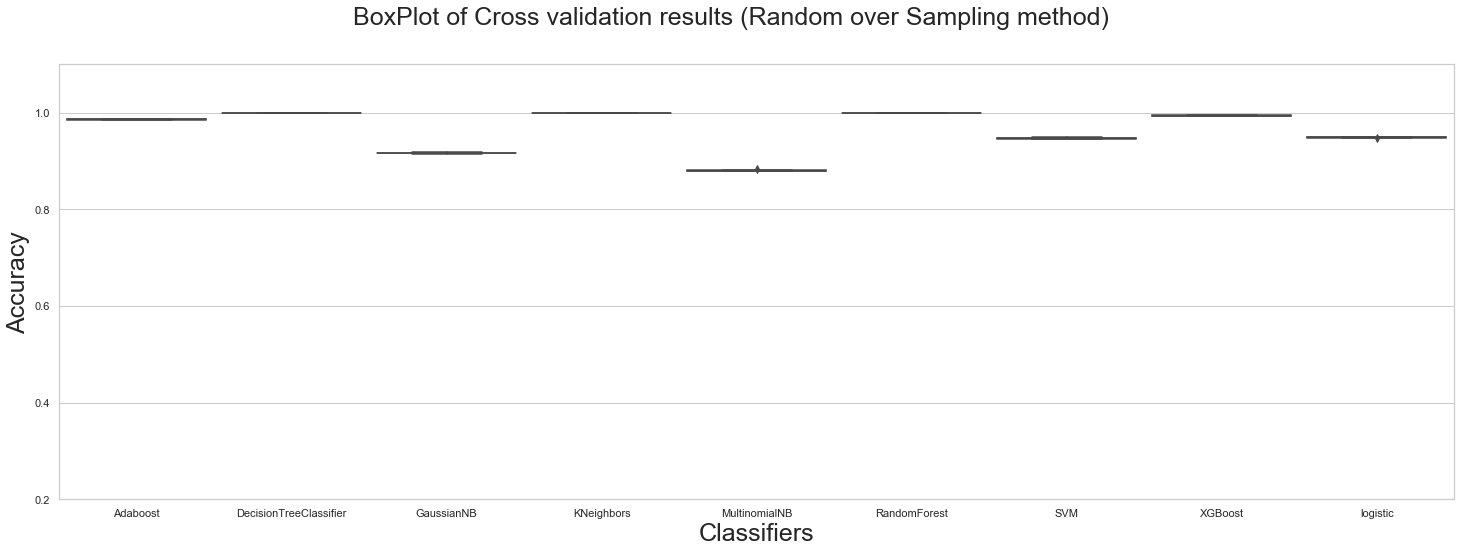

In [32]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.2,1.1])
fig.suptitle('BoxPlot of Cross validation results (Random over Sampling method) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.savefig('./ROS_cross_validation.png')
plt.show()

In [33]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTreeClassifier'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(76.99641933558783, 1.9628743075372768e-13, [45.5, 74.95, 15.5, 72.35, 5.5, 79.2, 26.5, 55.5, 34.5], [3.8944404818493075, 6.415127782738584, 1.32667752678383, 6.192588326632909, 0.47075654176200415, 6.778894201372861, 2.268190610307838, 4.750361466871133, 2.952927398325299])


In [34]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=11)
 Total time in : 
 196.11514282226562
Confusion_matrix 
 [[84135  1014]
 [ 1561 83879]]
Precision: 0.9880555522834628
Recall: 0.9817298689138577
f1_score: 0.9848825535862106
AUC: 0.985

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
 Total time in : 
 11.864170551300049
Confusion_matrix 
 [[85092    57]
 [    0 85440]]
Precision: 0.9993333099406997
Recall: 1.0
f1_score: 0.9996665438143877
AUC: 1.000

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.667630672454834
Confusion_matrix 
 [[82898  225

C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 Classifier is: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
 Total time in : 
 974.619143486023
Confusion_matrix 
 [[83253  1896]
 [ 6952 78488]]
Precision: 0.9764132165605095
Recall: 0.9186329588014981
f1_score: 0.9466422230798919
AUC: 0.948


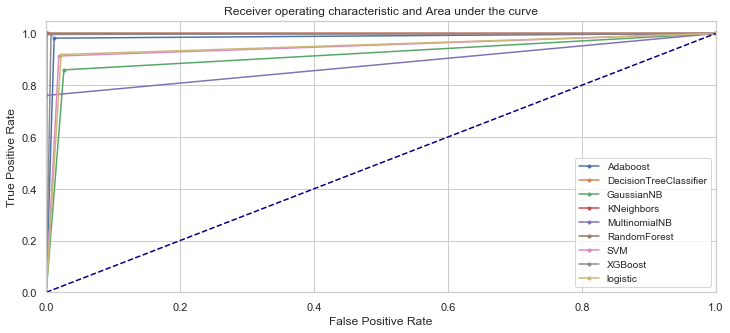

In [35]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred), metrics.f1_score(y_test,pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
    f1_score= print("f1_score:",metrics.f1_score(y_test,pred))
#     ROC AND AUC CURVE    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
    # show the plot
plt.savefig('./RandomOverSampling_1.png',dpi=300)
plt.show()

In [36]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.984905,0.988056,0.981730,0.984883,98.490524
DecisionTreeClassifier,0.999666,0.999333,1.000000,0.999667,99.966586
GaussianNB,0.916319,0.970251,0.859270,0.911394,91.631934
KNeighbors,0.999590,0.999181,1.000000,0.999591,99.958966
MultinomialNB,0.879822,0.999462,0.760463,0.863735,87.982226
RandomForest,0.999959,0.999918,1.000000,0.999959,99.995897
SVM,0.946954,0.979801,0.912910,0.945173,94.695438
XGBoost,0.994419,0.992791,0.996091,0.994438,99.441934
logistic,0.948133,0.976413,0.918633,0.946642,94.813265


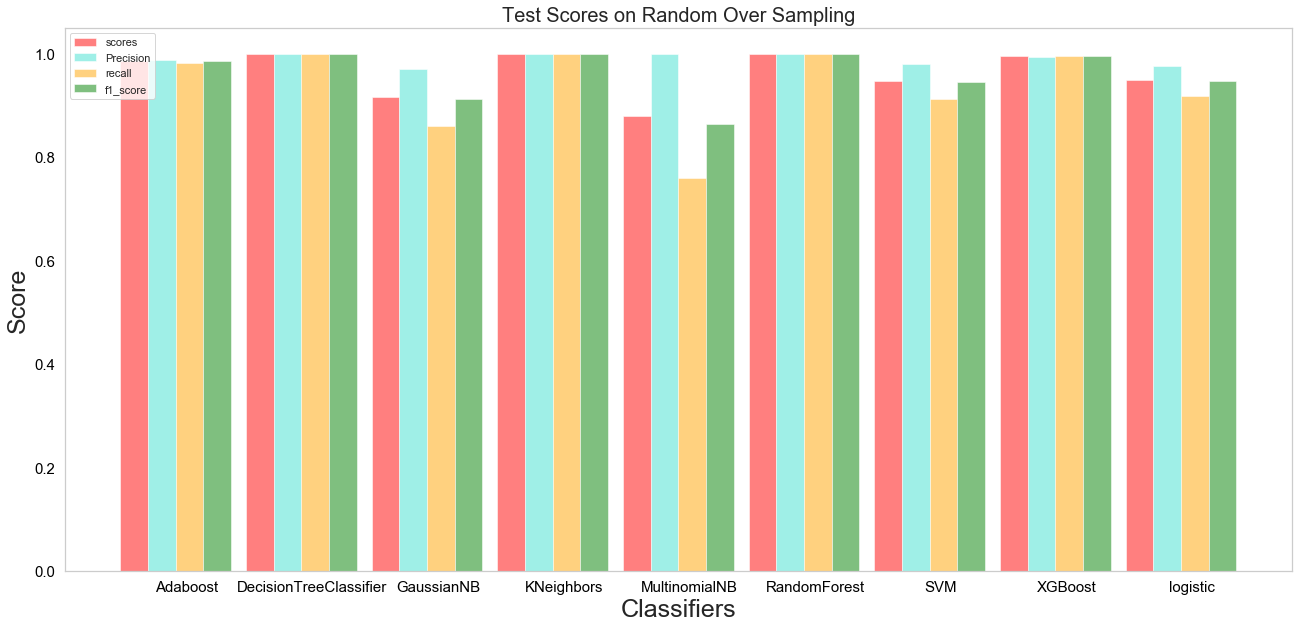

In [37]:
pos = list(range(len(df['Classiifier']))) 
width = 0.22 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(22,10)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='red',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 
plt.bar([p + width*3 for p in pos],score_df['f1_score'],width,alpha=0.5, color='green',label=score_df['f1_score']) 
ax.set_ylabel('Score',fontsize=25)
ax.set_xlabel('Classifiers',fontsize=25)
ax.set_title('Test Scores on Random Over Sampling',fontsize=20)
ax.set_xticks([p + 1.9 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
# plt.xlim(min(pos)-width, max(pos)+width*3)
# plt.ylim([0, max(score_df['scores'] + score_df['Precision'] + score_df['Recall']+score_df['f1_score'])] )
# plt.xlim([-1,X_train.shape[1]])
# plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall','f1_score'], loc='upper left')
plt.grid()
plt.tick_params(axis='both', which='major', colors='black', labelsize=15)
plt.savefig('./RandomOverSampling_2.png',dpi=300)

plt.show()

#### 3. AdaSyn
shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder3. AdaSyn


In [13]:
from imblearn.over_sampling import ADASYN 
sm = ADASYN()
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))
print(y.shape)

284315
492
(284807,)


In [14]:
Xasm, yasm = sm.fit_sample(X, y) 
print(np.count_nonzero(yasm == 0))
print(np.count_nonzero(yasm == 1))
print('sampled dataset shape %s' % Counter(yasm))
X_train, X_test, y_train, y_test = train_test_split(Xasm, yasm, test_size=0.3, random_state=42)

284315
284327
sampled dataset shape Counter({1: 284327, 0: 284315})


C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

<Figure size 2160x1800 with 0 Axes>

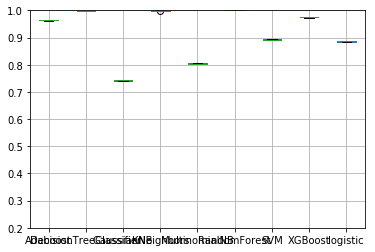

,Adaboost,DecisionTreeClassifier,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.961118,0.998452,0.745063,0.999015,0.806436,0.999859,0.893291,0.974009,0.887189
1,0.962859,0.998751,0.741317,0.999297,0.803183,0.999912,0.892693,0.976066,0.887505
2,0.963475,0.998628,0.744711,0.999121,0.805610,0.999912,0.892025,0.977332,0.884182
3,0.964530,0.998681,0.742531,0.999121,0.804308,0.999842,0.889862,0.977244,0.885659
4,0.962719,0.998839,0.743322,0.999050,0.803148,0.999877,0.892201,0.974202,0.887294
5,0.964037,0.998945,0.742297,0.999437,0.804323,0.999912,0.892269,0.973516,0.885569
6,0.963316,0.998804,0.740961,0.999050,0.804622,0.999930,0.893272,0.975081,0.887715
7,0.965267,0.998523,0.741642,0.999209,0.803088,0.999930,0.890931,0.974465,0.885514
8,0.964247,0.998681,0.742504,0.999121,0.806887,0.999930,0.890913,0.976347,0.883896
9,0.961891,0.998611,0.743735,0.999033,0.805480,0.999912,0.894290,0.974500,0.883105


In [15]:
#predict and storing score of each classifier
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
    results = cross_val_score(c,Xasm, yasm, cv=kfold)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
#     testres=friedman_aligned_ranks_test(results)
    result=pd.DataFrame(results)
#     print(result)
#     sns.boxplot( result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
#     plt.ylabel('Accuracy')
#     plt.xticks(parameter_df['mean'])
# print(res)
res.columns = ['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.2,1.0])
plt.show()
res

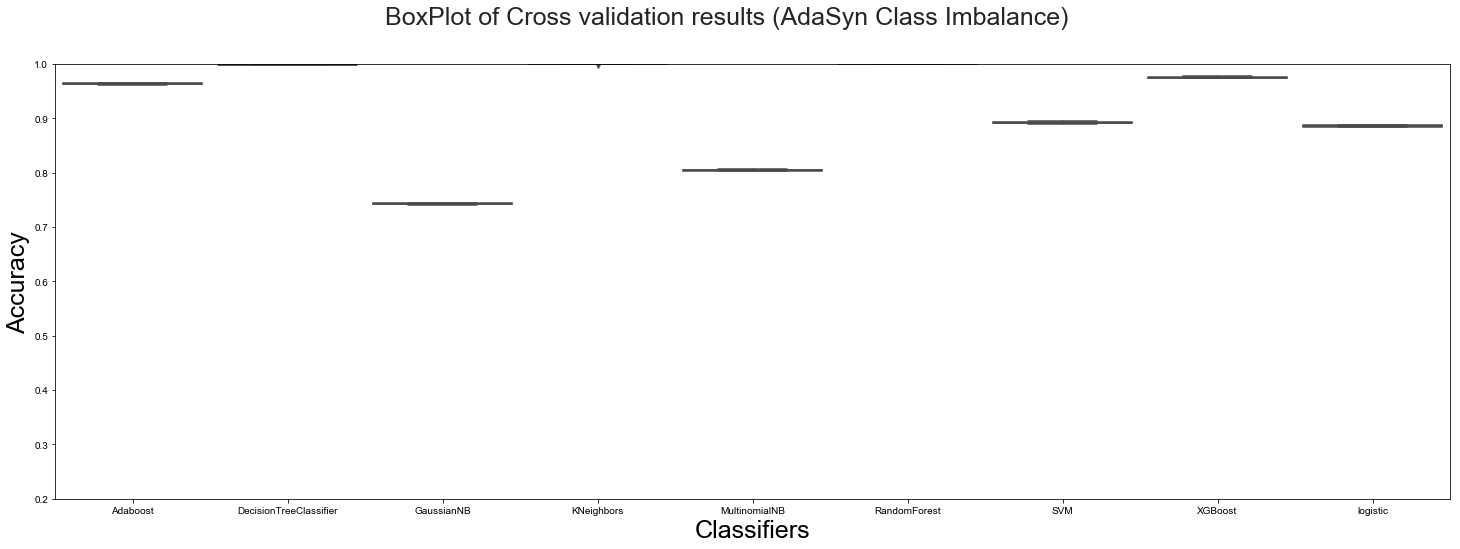

In [16]:
# rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.2,1.0])
fig.suptitle('BoxPlot of Cross validation results (AdaSyn Class Imbalance) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.savefig('./AdSyn_cross_validation.png')
plt.show()

In [17]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.963346
DecisionTreeClassifier,0.998692
GaussianNB,0.742808
KNeighbors,0.999145
MultinomialNB,0.804708
RandomForest,0.999902
SVM,0.892175
XGBoost,0.975276
logistic,0.885763


In [18]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTreeClassifier'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(78.75844277673545, 8.693046282814976e-14, [45.5, 66.7, 5.5, 74.7, 15.5, 85.1, 35.5, 55.5, 25.5], [3.8944404818493075, 5.708992970095578, 0.47075654176200415, 6.393729758113039, 1.32667752678383, 7.283887582535737, 3.0385194968274813, 4.750361466871133, 2.1825985118056557])


In [19]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=11)
 Total time in : 
 209.81226062774658
Confusion_matrix 
 [[81935  3233]
 [ 2828 82597]]
Precision: 0.9623325177676803
Recall: 0.9668949370793093
f1_score: 0.9646083326034277
AUC: 0.964

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
 Total time in : 
 33.62864947319031
Confusion_matrix 
 [[84954   214]
 [   51 85374]]
Precision: 0.9974996494835725
Recall: 0.9994029850746269
f1_score: 0.9984504102027333
AUC: 0.998

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.6096470355987549
Confusion_matrix

C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 Classifier is: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
 Total time in : 
 1916.1572918891907
Confusion_matrix 
 [[78273  6895]
 [12409 73016]]
Precision: 0.9137165096169488
Recall: 0.8547380743342113
f1_score: 0.8832438186480864
AUC: 0.887


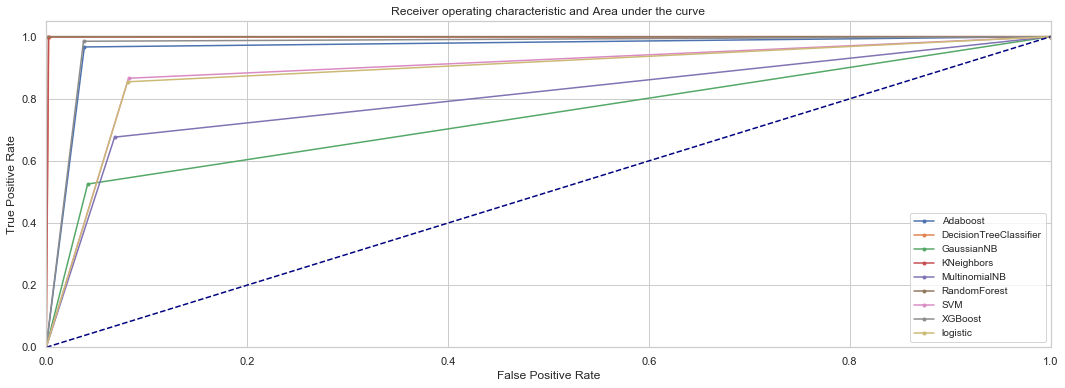

In [20]:
score = []
plt.subplots(figsize=(18,6))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred), metrics.f1_score(y_test,pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
    f1_score= print("f1_score:",metrics.f1_score(y_test,pred))
#     ROC AND AUC CURVE    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.savefig('./AdSyn_2.png',dpi=300)
    # show the plot
plt.show()

In [21]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.964471,0.962333,0.966895,0.964608,96.447099
DecisionTreeClassifier,0.998447,0.997500,0.999403,0.998450,99.844660
GaussianNB,0.741807,0.927354,0.525560,0.670901,74.180652
KNeighbors,0.998857,0.997722,1.000000,0.998860,99.885693
MultinomialNB,0.804037,0.908785,0.676570,0.775671,80.403651
RandomForest,0.999894,0.999789,1.000000,0.999895,99.989449
SVM,0.892030,0.913740,0.866152,0.889310,89.202957
XGBoost,0.974043,0.963778,0.985192,0.974367,97.404348
logistic,0.886842,0.913717,0.854738,0.883244,88.684178


Adaboost                  0.964471
DecisionTreeClassifier    0.998447
GaussianNB                0.741807
KNeighbors                0.998857
MultinomialNB             0.804037
RandomForest              0.999894
SVM                       0.892030
XGBoost                   0.974043
logistic                  0.886842
Name: scores, dtype: float64
Adaboost                  0.962333
DecisionTreeClassifier    0.997500
GaussianNB                0.927354
KNeighbors                0.997722
MultinomialNB             0.908785
RandomForest              0.999789
SVM                       0.913740
XGBoost                   0.963778
logistic                  0.913717
Name: Precision, dtype: float64


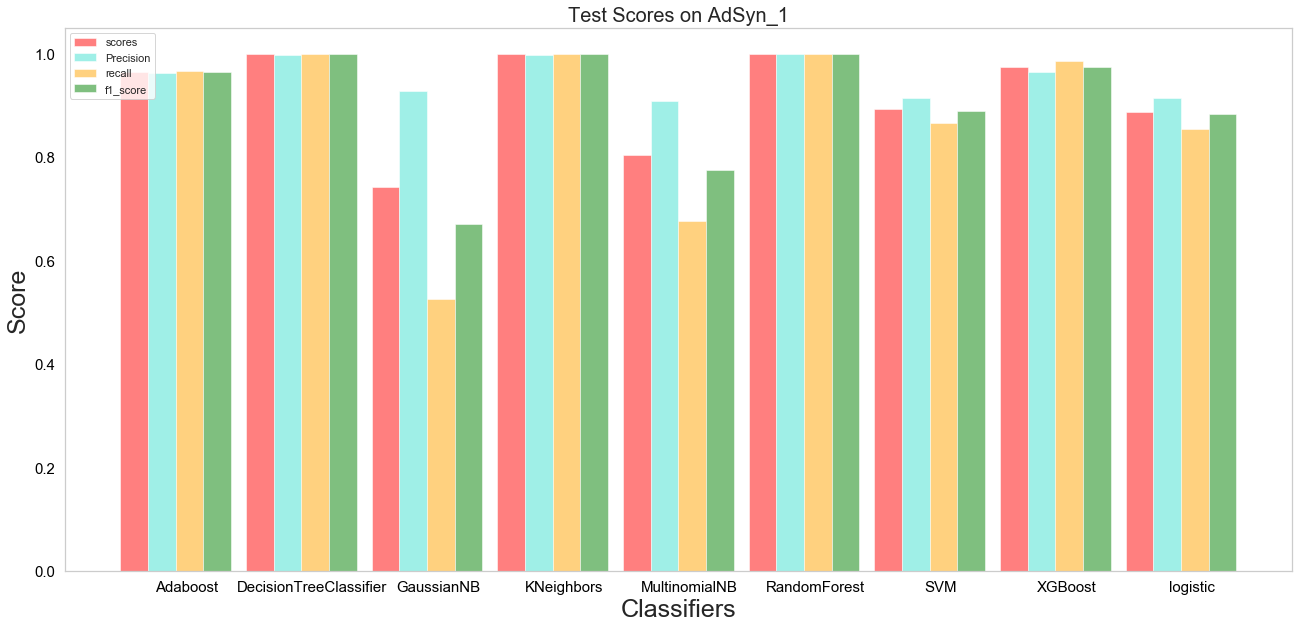

In [22]:
pos = list(range(len(df['Classiifier']))) 
width = 0.22 
print(score_df['scores'])
print(score_df['Precision'])
# Plotting the bars
fig, ax = plt.subplots(figsize=(22,10)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='red',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 
plt.bar([p + width*3 for p in pos],score_df['f1_score'],width,alpha=0.5, color='green',label=score_df['f1_score']) 
ax.set_ylabel('Score',fontsize=25)
ax.set_xlabel('Classifiers',fontsize=25)
ax.set_title('Test Scores on AdSyn_1',fontsize=20)
ax.set_xticks([p + 1.9 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
# plt.xlim(min(pos)-width, max(pos)+width*3)
# plt.ylim([0, max(score_df['scores'] + score_df['Precision'] + score_df['Recall']+score_df['f1_score'])] )
# plt.xlim([-1,X_train.shape[1]])
# plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall','f1_score'], loc='upper left')
plt.grid()
plt.tick_params(axis='both', which='major', colors='black', labelsize=15)
plt.savefig('./AdSyn_1.png',dpi=300)
plt.show()

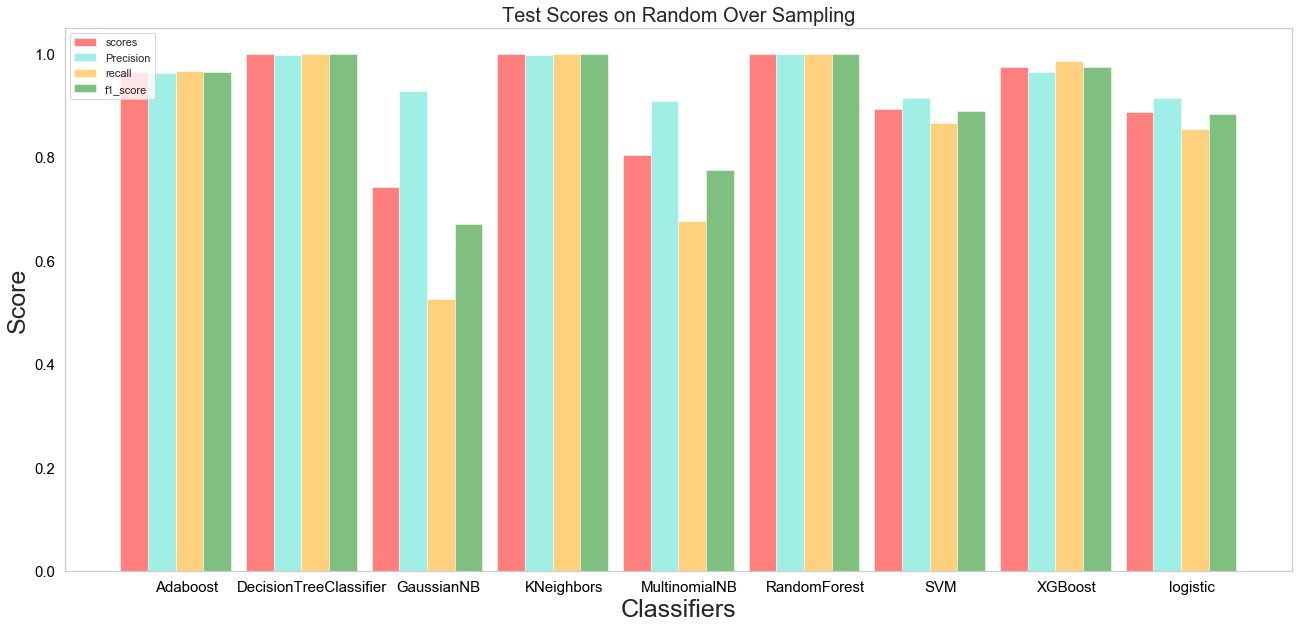

In [23]:
pos = list(range(len(df['Classiifier']))) 
width = 0.22 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(22,10)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='red',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 
plt.bar([p + width*3 for p in pos],score_df['f1_score'],width,alpha=0.5, color='green',label=score_df['f1_score']) 
ax.set_ylabel('Score',fontsize=25)
ax.set_xlabel('Classifiers',fontsize=25)
ax.set_title('Test Scores on Random Over Sampling',fontsize=20)
ax.set_xticks([p + 1.9 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
# plt.xlim(min(pos)-width, max(pos)+width*3)
# plt.ylim([0, max(score_df['scores'] + score_df['Precision'] + score_df['Recall']+score_df['f1_score'])] )
# plt.xlim([-1,X_train.shape[1]])
# plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall','f1_score'], loc='upper left')
plt.grid()
plt.tick_params(axis='both', which='major', colors='black', labelsize=15)
plt.savefig('./AdSyn_1.png',dpi=300)

plt.show()